In [6]:
## import yahoo data about circle stock
import yfinance as yf
from datetime import date
import pandas as pd

start_date = "2025-06-01"
end_date = date.today().strftime("%Y-%m-%d")
df = yf.download("CRCL", start=start_date, end=end_date, auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [7]:
import pandas as pd
from technical_indicator import RSI_calculator, MACD_calculator, momentum_calculator
# Use the Close (or Adj Close) series, not the whole df, if your funcs expect a 1-D series
price = df["Close"]
rsi     = RSI_calculator(df)
macd    = MACD_calculator(df)[0]
signal  = MACD_calculator(df)[1]
moment  = momentum_calculator(df)

df = pd.concat([price, rsi, macd, signal, moment], axis=1)
df.columns = ['Price', 'RSI', 'MACD', 'MACD_Signal', 'Momentum']
df

,Price,RSI,MACD,MACD_Signal,Momentum
Date,,,,,
2025-06-05,83.230003,NaN,0.000000,0.000000,NaN
2025-06-06,107.699997,NaN,1.952022,0.390404,NaN
2025-06-09,115.250000,NaN,4.061419,1.124607,NaN
2025-06-10,105.910004,NaN,4.922725,1.884231,NaN
2025-06-11,117.199997,NaN,6.442064,2.795797,NaN
2025-06-12,106.540001,NaN,6.708646,3.578367,NaN
2025-06-13,133.559998,NaN,8.996495,4.661993,NaN
2025-06-16,151.059998,NaN,12.082458,6.146086,NaN
2025-06-17,149.149994,NaN,14.210177,7.758904,NaN


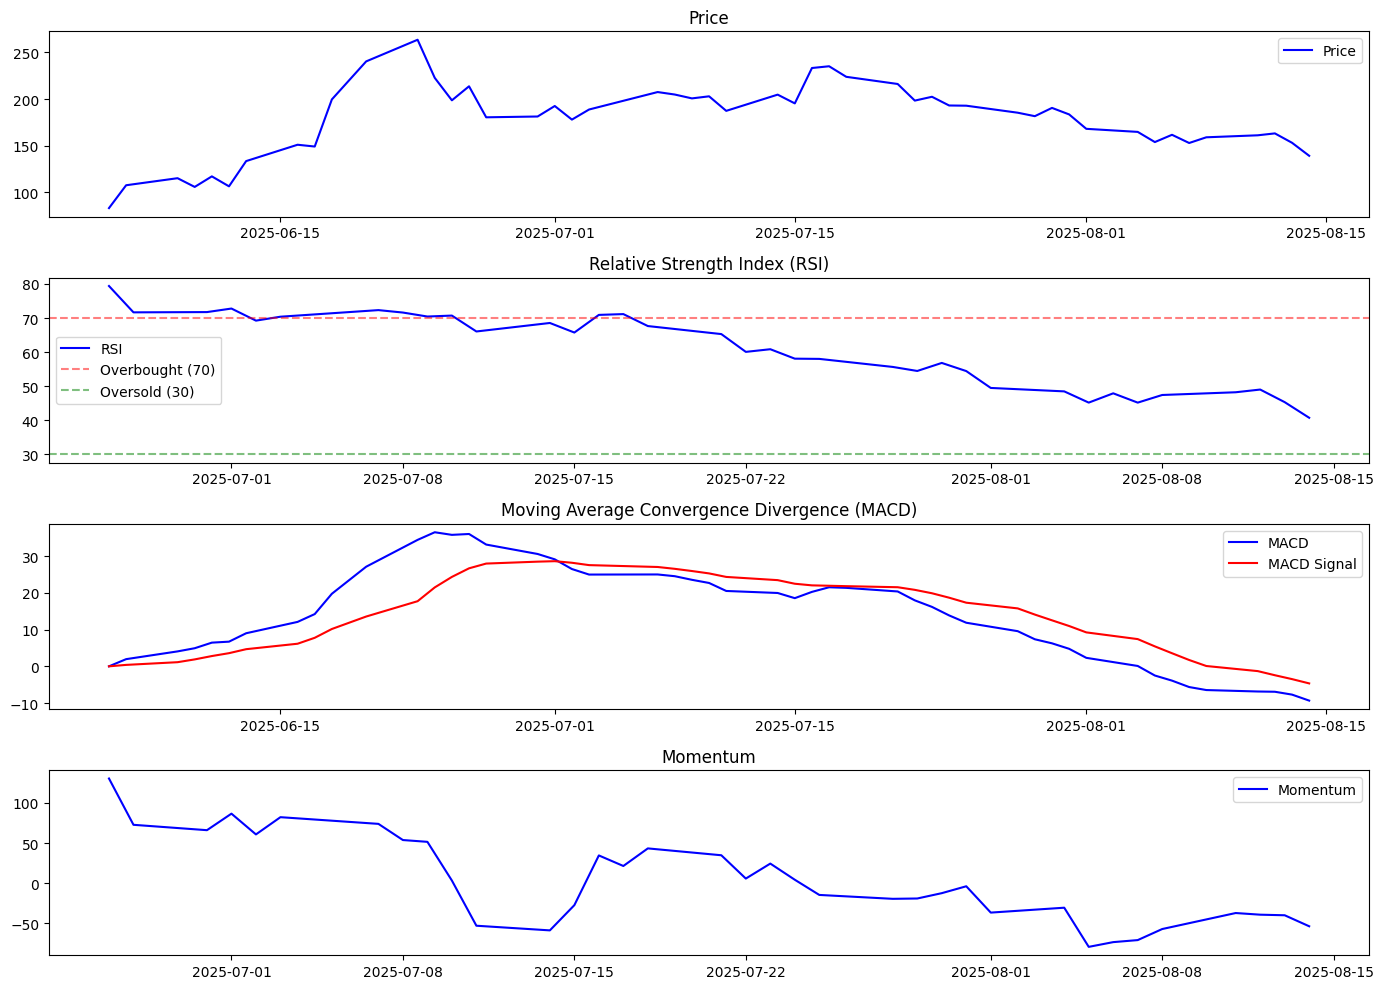

In [11]:
## plot the rsi momentum and MACD
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
# Plot Price
plt.subplot(4, 1, 1)
plt.plot(df.index, df["Price"], label="Price", color="blue")
plt.title("Price")
plt.legend()

# Plot RSI
plt.subplot(4, 1, 2)
plt.plot(df.index, df["RSI"], label="RSI", color="blue")
plt.axhline(70, linestyle="--", alpha=0.5, color="red", label="Overbought (70)")
plt.axhline(30, linestyle="--", alpha=0.5, color="green", label="Oversold (30)")
plt.title("Relative Strength Index (RSI)")
plt.legend()

# Plot MACD
plt.subplot(4, 1, 3)
plt.plot(df.index, df["MACD"], label="MACD", color="blue")
plt.plot(df.index, df["MACD_Signal"], label="MACD Signal", color="red")
plt.title("Moving Average Convergence Divergence (MACD)")
plt.legend()

# Plot Momentum
plt.subplot(4, 1, 4)
plt.plot(df.index, df["Momentum"], label="Momentum", color="blue")
plt.title("Momentum")
plt.legend()

plt.tight_layout()
plt.show()